In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [166]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 1000

In [167]:
true_params = [r, 2.2, 0.01, 0.29, -0.6, 0.02]

In [168]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

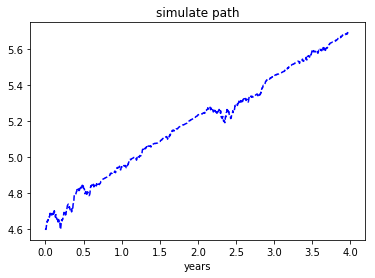

In [180]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[64]]


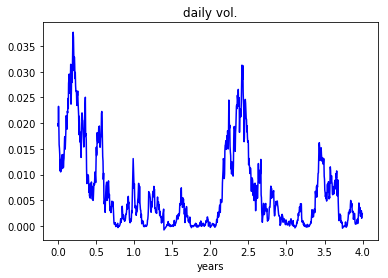

In [181]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# Optimization

In [211]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    return kf.ukf_heston_obj(y, params, S0)

In [212]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [213]:
args = (np.array(y[0,:])[0], S0)
maxiter = 100000

In [270]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
True Params: [0.2, 2.2, 0.01, 0.29, -0.6, 0.02]


In [271]:
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, init_params, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 940
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7771.625293735754
i: 941
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7771.625293735754
i: 942
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7771.625293735754
i: 943
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -7771.625293735754
i: 944
x_i: [ 0.52888889  1.19777778  0.03033333  0.38111111 -0.39407407  0.03606944]
f_i: -7850.029211126428
i: 945
x_i: [ 0.52888889  1.19777778  0.03033333  0.38111111 -0.39407407  0.03606944]
f_i: -7850.029211126428
i: 946
x_i: [ 0.45777778  1.15805556  0.03066667  0.39180556 -0.38814815  0.03713889]
f_i: -8033.503045831425
i: 947
x_i: [ 0.45777778  1.15805556  0.03066667  0.39180556 -0.38814815  0.03713889]
f_i: -8033.503045831425
i: 948
x_i: [ 0.45777778  1.15805556  0.03066667  0.39180556 -0.38814815  0.03713889]
f_i: -8033.503045831425
i: 949
x_i: [ 0.37185185  1.24259259  0.03136111  0.395370

f_i: -9925.36119759902
i: 1016
x_i: [ 0.02482441  0.85043105  0.04401593  0.56170502 -0.24398738  0.05544083]
f_i: -9925.36119759902
i: 1017
x_i: [ 0.02482441  0.85043105  0.04401593  0.56170502 -0.24398738  0.05544083]
f_i: -9925.36119759902
i: 1018
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i: -9931.453730893743
i: 1019
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i: -9931.453730893743
i: 1020
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i: -9931.453730893743
i: 1021
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i: -9931.453730893743
i: 1022
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i: -9931.453730893743
i: 1023
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i: -9931.453730893743
i: 1024
x_i: [ 0.03231097  0.8210784   0.04412912  0.55566    -0.25054042  0.05548014]
f_i:

f_i: -10015.240604432176
i: 1090
x_i: [ 0.1893044  -0.6839185   0.0563317   0.40043035 -0.39059623  0.06671125]
f_i: -10015.240604432176
i: 1091
x_i: [ 0.1893044  -0.6839185   0.0563317   0.40043035 -0.39059623  0.06671125]
f_i: -10015.240604432176
i: 1092
x_i: [ 0.1893044  -0.6839185   0.0563317   0.40043035 -0.39059623  0.06671125]
f_i: -10015.240604432176
i: 1093
x_i: [ 0.1893044  -0.6839185   0.0563317   0.40043035 -0.39059623  0.06671125]
f_i: -10015.240604432176
i: 1094
x_i: [ 0.1893044  -0.6839185   0.0563317   0.40043035 -0.39059623  0.06671125]
f_i: -10015.240604432176
i: 1095
x_i: [ 0.1893044  -0.6839185   0.0563317   0.40043035 -0.39059623  0.06671125]
f_i: -10015.240604432176
i: 1096
x_i: [ 0.18862521 -0.66695517  0.05622058  0.40236874 -0.38885505  0.06659984]
f_i: -10015.471480758695
i: 1097
x_i: [ 0.18896481 -0.67543684  0.05627614  0.40139955 -0.38972564  0.06665555]
f_i: -10015.479608341127
i: 1098
x_i: [ 0.18896481 -0.67543684  0.05627614  0.40139955 -0.38972564  0.06

f_i: -10015.844969880438
i: 1164
x_i: [ 0.18111184 -0.58233473  0.05571919  0.41239094 -0.37882458  0.06611218]
f_i: -10015.844969880438
i: 1165
x_i: [ 0.18111184 -0.58233473  0.05571919  0.41239094 -0.37882458  0.06611218]
f_i: -10015.844969880438
i: 1166
x_i: [ 0.18116578 -0.58321505  0.05572968  0.41234887 -0.37888417  0.06611947]
f_i: -10015.845782406195
i: 1167
x_i: [ 0.18116578 -0.58321505  0.05572968  0.41234887 -0.37888417  0.06611947]
f_i: -10015.845782406195
i: 1168
x_i: [ 0.18116578 -0.58321505  0.05572968  0.41234887 -0.37888417  0.06611947]
f_i: -10015.845782406195
i: 1169
x_i: [ 0.18146387 -0.58628975  0.05574792  0.4119972  -0.37928717  0.06613441]
f_i: -10015.845917405279
i: 1170
x_i: [ 0.18133959 -0.58513165  0.05574341  0.41215531 -0.37908922  0.06613116]
f_i: -10015.845953704407
i: 1171
x_i: [ 0.18131037 -0.58483387  0.05574144  0.41219514 -0.37913852  0.06612473]
f_i: -10015.84749172342
i: 1172
x_i: [ 0.18131037 -0.58483387  0.05574144  0.41219514 -0.37913852  0.066

f_i: -10015.983451909718
i: 1238
x_i: [ 0.18568007 -0.61496889  0.05649427  0.41612239 -0.38270748  0.06625718]
f_i: -10015.983451909718
i: 1239
x_i: [ 0.18614074 -0.62046608  0.05655087  0.41576039 -0.38315651  0.06629842]
f_i: -10015.992040287816
i: 1240
x_i: [ 0.18604434 -0.62231075  0.0565147   0.41491461 -0.38326911  0.06631828]
f_i: -10015.992386634645
i: 1241
x_i: [ 0.18604434 -0.62231075  0.0565147   0.41491461 -0.38326911  0.06631828]
f_i: -10015.992386634645
i: 1242
x_i: [ 0.18604434 -0.62231075  0.0565147   0.41491461 -0.38326911  0.06631828]
f_i: -10015.992386634645
i: 1243
x_i: [ 0.18604434 -0.62231075  0.0565147   0.41491461 -0.38326911  0.06631828]
f_i: -10015.992386634645
i: 1244
x_i: [ 0.18573159 -0.61418659  0.05653798  0.41682414 -0.3826667   0.06624822]
f_i: -10015.99750516661
i: 1245
x_i: [ 0.18573159 -0.61418659  0.05653798  0.41682414 -0.3826667   0.06624822]
f_i: -10015.99750516661
i: 1246
x_i: [ 0.18573159 -0.61418659  0.05653798  0.41682414 -0.3826667   0.0662

i: 1311
x_i: [ 0.23606293 -0.62697227  0.08340726  0.7503393  -0.37835728  0.06562416]
f_i: -10022.217536891512
i: 1312
x_i: [ 0.23725044 -0.61763512  0.08450377  0.76580084 -0.37722674  0.06553216]
f_i: -10022.231337538422
i: 1313
x_i: [ 0.23357087 -0.63497412  0.08201472  0.73124386 -0.37916749  0.06573868]
f_i: -10022.35273504113
i: 1314
x_i: [ 0.23357087 -0.63497412  0.08201472  0.73124386 -0.37916749  0.06573868]
f_i: -10022.35273504113
i: 1315
x_i: [ 0.23357087 -0.63497412  0.08201472  0.73124386 -0.37916749  0.06573868]
f_i: -10022.35273504113
i: 1316
x_i: [ 0.23436752 -0.63139059  0.08254577  0.73857946 -0.37867369  0.06570122]
f_i: -10022.423441390547
i: 1317
x_i: [ 0.23436752 -0.63139059  0.08254577  0.73857946 -0.37867369  0.06570122]
f_i: -10022.423441390547
i: 1318
x_i: [ 0.23436752 -0.63139059  0.08254577  0.73857946 -0.37867369  0.06570122]
f_i: -10022.423441390547
i: 1319
x_i: [ 0.23436752 -0.63139059  0.08254577  0.73857946 -0.37867369  0.06570122]
f_i: -10022.42344139

f_i: -10024.445740234767
i: 1385
x_i: [ 0.24167111 -0.56952256  0.0919229   0.86584774 -0.36804478  0.06527392]
f_i: -10024.445740234767
i: 1386
x_i: [ 0.24167111 -0.56952256  0.0919229   0.86584774 -0.36804478  0.06527392]
f_i: -10024.445740234767
i: 1387
x_i: [ 0.24240677 -0.56635018  0.09267285  0.87570781 -0.3674336   0.0652471 ]
f_i: -10024.459764728264
i: 1388
x_i: [ 0.24240677 -0.56635018  0.09267285  0.87570781 -0.3674336   0.0652471 ]
f_i: -10024.459764728264
i: 1389
x_i: [ 0.24246007 -0.5664263   0.09265887  0.87554406 -0.36750605  0.06524326]
f_i: -10024.461008086879
i: 1390
x_i: [ 0.24267548 -0.56732454  0.09273383  0.8763299  -0.36765138  0.06524218]
f_i: -10024.498659968682
i: 1391
x_i: [ 0.24267548 -0.56732454  0.09273383  0.8763299  -0.36765138  0.06524218]
f_i: -10024.498659968682
i: 1392
x_i: [ 0.24267548 -0.56732454  0.09273383  0.8763299  -0.36765138  0.06524218]
f_i: -10024.498659968682
i: 1393
x_i: [ 0.24267548 -0.56732454  0.09273383  0.8763299  -0.36765138  0.06

i: 1458
x_i: [ 0.23507552 -0.46127813  0.10028768  0.98798766 -0.35596174  0.06446715]
f_i: -10025.47848233069
i: 1459
x_i: [ 0.23507552 -0.46127813  0.10028768  0.98798766 -0.35596174  0.06446715]
f_i: -10025.47848233069
i: 1460
x_i: [ 0.23525155 -0.45745768  0.10088862  0.99607523 -0.35541775  0.06443608]
f_i: -10025.484593019131
i: 1461
x_i: [ 0.23525155 -0.45745768  0.10088862  0.99607523 -0.35541775  0.06443608]
f_i: -10025.484593019131
i: 1462
x_i: [ 0.23656793 -0.46407178  0.10094157  0.99565026 -0.35610209  0.06446769]
f_i: -10025.49639331643
i: 1463
x_i: [ 0.23656793 -0.46407178  0.10094157  0.99565026 -0.35610209  0.06446769]
f_i: -10025.49639331643
i: 1464
x_i: [ 0.23656793 -0.46407178  0.10094157  0.99565026 -0.35610209  0.06446769]
f_i: -10025.49639331643
i: 1465
x_i: [ 0.23656793 -0.46407178  0.10094157  0.99565026 -0.35610209  0.06446769]
f_i: -10025.49639331643
i: 1466
x_i: [ 0.23472821 -0.44884747  0.10174215  1.00801988 -0.35418141  0.06438674]
f_i: -10025.52544766093

f_i: -10025.750866052573
i: 1532
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1533
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1534
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1535
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1536
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1537
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1538
x_i: [ 0.23963377 -0.4130759   0.11088257  1.12702464 -0.34881032  0.06401405]
f_i: -10025.750866052573
i: 1539
x_i: [ 0.23837663 -0.40971221  0.11064378  1.12456991 -0.34866491  0.06399626]
f_i: -10025.770216534436
i: 1540
x_i: [ 0.23837663 -0.40971221  0.11064378  1.12456991 -0.34866491  0.06

f_i: -10025.8416230161
i: 1606
x_i: [ 0.23957341 -0.39155752  0.11485123  1.17937346 -0.34585726  0.06384068]
f_i: -10025.8416230161
i: 1607
x_i: [ 0.23957341 -0.39155752  0.11485123  1.17937346 -0.34585726  0.06384068]
f_i: -10025.8416230161
i: 1608
x_i: [ 0.23908441 -0.39097957  0.11458455  1.1761649  -0.34587614  0.06384177]
f_i: -10025.842108751147
i: 1609
x_i: [ 0.23908441 -0.39097957  0.11458455  1.1761649  -0.34587614  0.06384177]
f_i: -10025.842108751147
i: 1610
x_i: [ 0.23897166 -0.3894111   0.11481856  1.17928389 -0.34566328  0.06383149]
f_i: -10025.84244466066
i: 1611
x_i: [ 0.23893125 -0.39055312  0.11454962  1.17579853 -0.34585339  0.06383974]
f_i: -10025.842825656355
i: 1612
x_i: [ 0.2387806  -0.38950431  0.11465583  1.1772598  -0.34572689  0.0638337 ]
f_i: -10025.844833376861
i: 1613
x_i: [ 0.2387806  -0.38950431  0.11465583  1.1772598  -0.34572689  0.0638337 ]
f_i: -10025.844833376861
i: 1614
x_i: [ 0.2387806  -0.38950431  0.11465583  1.1772598  -0.34572689  0.0638337 ]

f_i: -10025.877176393606
i: 1680
x_i: [ 0.23885829 -0.37165138  0.11838045  1.22596482 -0.34349094  0.06366981]
f_i: -10025.877176393606
i: 1681
x_i: [ 0.23847457 -0.37001872  0.11843273  1.22684543 -0.34334495  0.06366079]
f_i: -10025.877472172087
i: 1682
x_i: [ 0.23847457 -0.37001872  0.11843273  1.22684543 -0.34334495  0.06366079]
f_i: -10025.877472172087
i: 1683
x_i: [ 0.23878327 -0.37023944  0.1186238   1.22917834 -0.34332575  0.06365809]
f_i: -10025.877778057096
i: 1684
x_i: [ 0.23878327 -0.37023944  0.1186238   1.22917834 -0.34332575  0.06365809]
f_i: -10025.877778057096
i: 1685
x_i: [ 0.23856477 -0.37030732  0.11843922  1.22688799 -0.34338137  0.06366111]
f_i: -10025.878086937271
i: 1686
x_i: [ 0.23856477 -0.37030732  0.11843922  1.22688799 -0.34338137  0.06366111]
f_i: -10025.878086937271
i: 1687
x_i: [ 0.23856477 -0.37030732  0.11843922  1.22688799 -0.34338137  0.06366111]
f_i: -10025.878086937271
i: 1688
x_i: [ 0.23856477 -0.37030732  0.11843922  1.22688799 -0.34338137  0.06

KeyboardInterrupt: 

# Plot Results

In [281]:
opt_params = [0.23932301, 0.3691899, 0.11930239, 1.23770765, -0.34310227, 0.06364089]

In [282]:
y_ = sim.simulate_heston_state(opt_params, S0, N=N) 

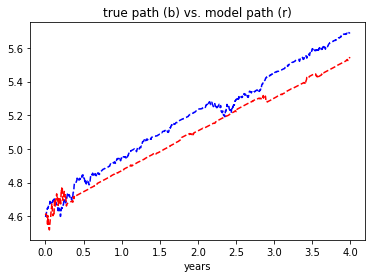

In [283]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path (b) vs. model path (r)')
plt.xlabel('years')
plt.show()

# neg vol: [[64]]


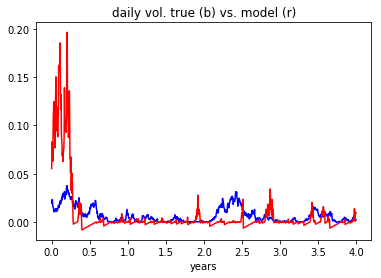

In [284]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.plot(years, y_[1,1:].T, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()